In [2]:
# imports
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import json
import nltk
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

from IPython import display
display.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')

In [3]:
# load the data
data = pd.read_csv("/content/sample_data/all_kindle_review .csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [4]:
# Columns needed!
data = data[['reviewText', 'rating']]
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [5]:
# Display shape
data.shape

(12000, 2)

In [6]:
# Null check
data.isnull().sum()

,0
reviewText,0
rating,0


In [7]:
# Rating count
data['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


In [8]:
# Classify rating above 3 as 1 and others 0.
data["rating"] = data["rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1

In [9]:
data['rating'].value_counts()

,count
rating,
0,8000
1,4000


In [10]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# get the text based on ratings!
rating_zero = data['reviewText'][data['rating'] == 0]
rating_one = data['reviewText'][data['rating'] == 1]


# word tokenize the data
def list_tokenizer(rating):
    ratings = " ".join(rating)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer
def word_cloud(rating, number):
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)
    wc.generate(rating)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title(f'WordCloud for {number}')
    plt.axis('off');

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

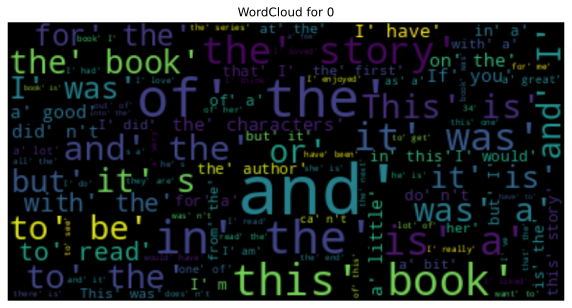

In [12]:
# Let's visuailze the ratings

word_cloud(list_tokenizer(rating_zero), 0)

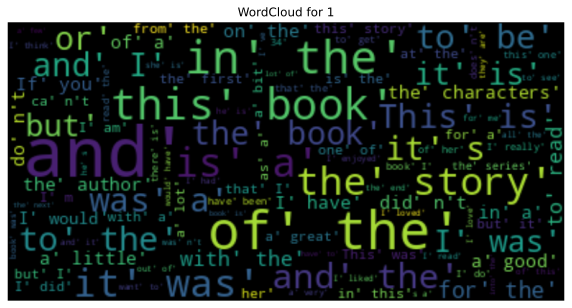

In [13]:
word_cloud(list_tokenizer(rating_zero), 1)

In [14]:
# Pre Process lower cases
data['reviewText'] = data['reviewText'].str.lower()  # lowering the case!
data.head()

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",0
1,great short read. i didn't want to put it dow...,0
2,i'll start by saying this is the first of four...,0
3,aggie is angela lansbury who carries pocketboo...,0
4,i did not expect this type of book to be in li...,0


In [15]:
# Pre Process remove punctuation
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))  # it removes the punctuation
data.head()

,reviewText,rating
0,jace rankin may be short but hes nothing to me...,0
1,great short read i didnt want to put it down ...,0
2,ill start by saying this is the first of four ...,0
3,aggie is angela lansbury who carries pocketboo...,0
4,i did not expect this type of book to be in li...,0


In [16]:
# Pre Process remove stopwords

from spacy.lang.en.stop_words import STOP_WORDS
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )

data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [17]:
# Pre Process remove url and tags
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [18]:
# Pre Process remove html tags
data['reviewText'] = data['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [19]:
# Pre process remove emails and extra spaces
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x.split()))
data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [20]:
# data split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data['reviewText'], data['rating'], test_size = 0.3)

In [21]:
# Convert text to numbers using BOW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# let's convert
xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

In [22]:
# Convert text to numbers using (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer()

# let's convert
xtrain_tf = tf_vectorizer.fit_transform(xtrain).toarray()
xtest_tf = tf_vectorizer.transform(xtest).toarray()

In [23]:
from sklearn.naive_bayes import GaussianNB

# USING BOW
clf_bow = GaussianNB().fit(xtrain_bow, ytrain)  # fitting
prediction_bow = clf_bow.predict(xtest_bow)  # predictions

# USINGN TFIDF
clf_tf = GaussianNB().fit(xtrain_tf, ytrain)
prediction_tf = clf_tf.predict(xtest_tf)

In [24]:
# let's check our model!
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(prediction, actual):
    print('Confusion_matrix \n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nclassification_report\n')
    print(classification_report(actual, prediction))


metrics(prediction_bow, ytest)

Confusion_matrix 
 [[1408 1000]
 [ 445  747]]

Accuracy: 0.5986111111111111

classification_report

              precision    recall  f1-score   support

           0       0.76      0.58      0.66      2408
           1       0.43      0.63      0.51      1192

    accuracy                           0.60      3600
   macro avg       0.59      0.61      0.58      3600
weighted avg       0.65      0.60      0.61      3600



In [25]:
metrics(prediction_tf, ytest)

Confusion_matrix 
 [[1436  972]
 [ 462  730]]

Accuracy: 0.6016666666666667

classification_report

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      2408
           1       0.43      0.61      0.50      1192

    accuracy                           0.60      3600
   macro avg       0.59      0.60      0.59      3600
weighted avg       0.65      0.60      0.61      3600



In [26]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
#model.add(Dense(12, input_dim=8, activation='relu'))
#model.add(Dense(8,  activation='relu'))
#model.add(Dense(1,  activation='sigmoid'))
model.add(Dense(12, input_shape=(xtrain_tf.shape[1],), activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(xtrain_tf, ytrain, epochs=5, batch_size=10)
# evaluate the model

Epoch 1/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6852 - loss: 0.5968
Epoch 2/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9062 - loss: 0.2948
Epoch 3/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9510 - loss: 0.1705
Epoch 4/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9735 - loss: 0.1116
Epoch 5/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9836 - loss: 0.0715


In [27]:
scores = model.evaluate(xtest_tf, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cnn_acc =  scores[1]
print(cnn_acc)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8266 - loss: 0.4338
compile_metrics: 82.53%
0.8252778053283691
